In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


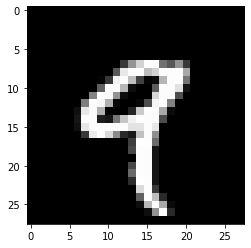

In [5]:
plt.imshow(X_train[y_train == 9][0], cmap='gray')

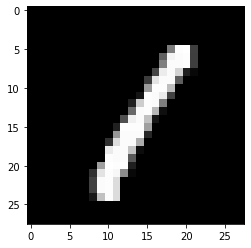

In [6]:
plt.imshow(X_train[y_train == 1][0], cmap='gray')

In [7]:
samples = []
for i in range(10):
    samples.append((X_train[y_train==i]).shape[0])

In [8]:
samples

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [9]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [11]:
#let's normalize
X_train = X_train / 255 #255/255=1  127/255=0.5 ...
X_test = X_test / 255

In [12]:
# flatten
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0],n_pixels)
X_test = X_test.reshape(X_test.shape[0],n_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
def cread_model():
    model = Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = cread_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs= 25, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 46us/sample - loss: 0.5409 - accuracy: 0.8360 - val_loss: 0.2564 - val_accuracy: 0.9260
Epoch 2/25
54000/54000 [==============================] - 2s 39us/sample - loss: 0.2867 - accuracy: 0.9165 - val_loss: 0.2606 - val_accuracy: 0.9268
Epoch 3/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2572 - accuracy: 0.9254 - val_loss: 0.2151 - val_accuracy: 0.9398
Epoch 4/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.2394 - accuracy: 0.9298 - val_loss: 0.2140 - val_accuracy: 0.9392
Epoch 5/25
54000/54000 [==============================] - 2s 31us/sample - loss: 0.2302 - accuracy: 0.9324 - val_loss: 0.1987 - val_accuracy: 0.9412
Epoch 6/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.2189 - accuracy: 0.9345 - val_loss: 0.1985 - val_accuracy: 0.9438
Epoch 7/25
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

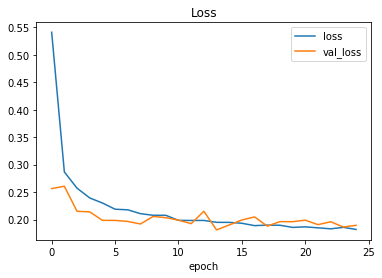

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

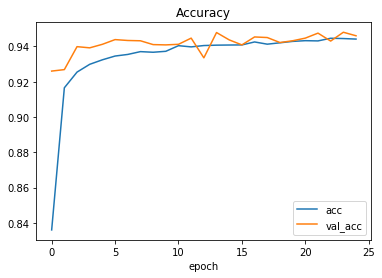

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
score = model.evaluate(X_test, y_test, verbose = 1)
print(type(score))

10000/10000 [==============================] - 1s 92us/sample - loss: 0.2351 - accuracy: 0.9348
<class 'list'>


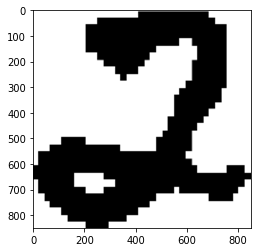

In [21]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 137   0   0   0   0
    0   0   0   0  33 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 253 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   1   1
    1 255  19   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 222   0   0   0   0   0   0   0 222 255 255
  255 255 255   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 234   0   0   0   0   0 234 255 255 255
  255 255  40   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 192   0   0 118 255 255 255 255
  255 255  20   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 25

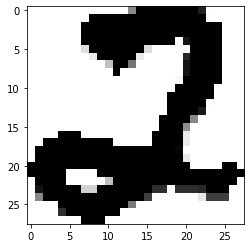

In [22]:
import cv2

img_arr = np.asarray(img)
resize = cv2.resize(img_arr, (28,28))
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
print(gray)